### Thư viện

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Benchmark

In [2]:
def onemax( ind ):
    """
    Hàm đánh giá OneMax: Đếm số bit 1 trong chuỗi nhị phân (cá thể ind).

    Arguments:
    ind -- Cá thể cần được đánh giá.

    Returns:
    value -- Giá trị của cá thể ind.
    """

    value = np.sum(ind)

    return value

In [3]:
def leading_one(individual):
    count = 0
    for bit in individual[:10]:
        if bit == 1:
            count += 1
        else:
            break
    return count

In [4]:
def concatenated_trap_5(individual):
    total = 0
    for i in range(0, 20, 5):
        if sum(individual[i:i+5]) == 5:
            total += 5
        else:
            total += 4 - sum(individual[i:i+5])
    return total

### Genetic Algorithm theo bản cài đặt POPOP và 3 cơ chế chọn lọc

In [5]:
def initialize_population( num_individuals, num_variables ):
    """
    Khởi tạo quần thể gồm num_individuals cá thể. Mỗi cá thể có num_parameters biến.

    Arguments:
    num_individuals -- Số lượng cá thể
    num_variables -- Số lượng biến

    Returns:
    pop -- Ma trận (num_individuals, num_variables ) chứa quần thể mới được khởi tạo ngẫu nhiên.
    """

    pop = np.random.randint(2, size=(num_individuals, num_variables))


    return pop

In [6]:
def better_fitness(fitness_a, fitness_b):
    return fitness_a > fitness_b

def tournament_selection(pop, pop_fitness, selection_size, tournament_size):
    num_individuals = len(pop)
    selected_indices = []

    while len(selected_indices) < selection_size:
        indices = np.random.permutation(num_individuals)

        for i in range(0, num_individuals, tournament_size):
            tournament_indices = indices[i:i+tournament_size]
            best_idx = tournament_indices[np.argmax(pop_fitness[tournament_indices])]
            selected_indices.append(best_idx)

    return np.array(selected_indices)

In [7]:
def truncation_selection(pop, pop_fitness, selection_size):
    selected_indices = np.argsort(pop_fitness)[-selection_size:]
    return selected_indices

In [8]:
def proportional_selection(population, fitness, selection_size):
    selection_probs = fitness / np.sum(fitness)
    selected_indices = np.random.choice(len(population), selection_size, p=selection_probs)
    return selected_indices

In [9]:
def crossover( pop ):
    """
    Hàm biến đổi tạo ra các cá thể con.

    Arguments:
    pop -- Quàn thể hiện tại.

    Returns:
    offspring -- Quần thể chứa các cá thể con được sinh ra.
    """

    num_individuals = len(pop)
    num_parameters = len(pop[0])
    indices = np.arange(num_individuals)

    np.random.shuffle(indices)
    offspring = []

    for i in range(0, num_individuals, 2):
        idx1 = indices[i]
        idx2 = indices[i+1]
        offspring1 = list(pop[idx1])
        offspring2 = list(pop[idx2])

        for idx in range(0, num_parameters):
            r = np.random.rand()
            if r < 0.5:
                temp = offspring2[idx]
                offspring2[idx] = offspring1[idx]
                offspring1[idx] = temp

        offspring.append(offspring1)
        offspring.append(offspring2)

    offspring = np.array(offspring)
    return offspring

In [10]:
def genetic_algorithm(objective, num_individuals, num_parameters, max_evaluations, selection_mechanism, verbose=False):
    pop = initialize_population(num_individuals, num_parameters)
    pop_fitness = np.array([objective(ind) for ind in pop])
    num_evaluations = num_individuals
    best_fitness = []

    selection_size = num_individuals // 2

    while num_evaluations < max_evaluations:
        best_fitness.append([num_evaluations, np.max(pop_fitness)])
        offspring = crossover(pop)
        offspring_fitness = np.array([objective(ind) for ind in offspring])
        num_evaluations += len(offspring)
        pool = np.vstack([pop, offspring])
        pool_fitness = np.concatenate((pop_fitness, offspring_fitness))
        if selection_mechanism == "tournament":
            selected_indices = tournament_selection(pool, pool_fitness, selection_size, 4)
        elif selection_mechanism == "truncation":
            selected_indices = truncation_selection(pool, pool_fitness, selection_size)
        elif selection_mechanism == "proportional":
            selected_indices = proportional_selection(pool, pool_fitness, selection_size)
        pop = pool[selected_indices]
        pop_fitness = pool_fitness[selected_indices]
    best_fitness.append([num_evaluations, np.max(pop_fitness)])
    return (pop, pop_fitness, best_fitness)


### Experiment

In [11]:
def run_experiment(objective, num_individuals, num_parameters, max_evaluations, selection_mechanism, num_runs=10):
    results = {}
    avg_best_fitness = []
    std_dev_best_fitness = []

    for seed in range(10):
        np.random.seed(21521749 + seed)
        best_fitness_runs = []

        for _ in range(num_runs):
            _, _, best_fitness = genetic_algorithm(objective, num_individuals, num_parameters, max_evaluations, selection_mechanism)
            best_fitness_runs.append(best_fitness[-1][1])

        avg_best_fitness.append(np.mean(best_fitness_runs))
        std_dev_best_fitness.append(np.std(best_fitness_runs))

    results[num_individuals] = (avg_best_fitness, std_dev_best_fitness)

    return results

Tournament

In [12]:
num_individuals = 128
num_parameters = 100
max_evaluations = 100000
results_tournament_selection_onemax = run_experiment(onemax, num_individuals, num_parameters, max_evaluations, "tournament")
results_tournament_selection_leading_one = run_experiment(leading_one, num_individuals, num_parameters, max_evaluations, "tournament")
results_tournament_selection_concat_trap5 = run_experiment(concatenated_trap_5, num_individuals, num_parameters, max_evaluations, "tournament")

Truncation

In [13]:
num_individuals = 128
num_parameters = 100
max_evaluations = 100000
results_truncation_selection_onemax = run_experiment(onemax, num_individuals, num_parameters, max_evaluations, "truncation")
results_truncation_selection_leading_one = run_experiment(leading_one, num_individuals, num_parameters, max_evaluations, "truncation")
results_truncation_selection_concat_trap5 = run_experiment(concatenated_trap_5, num_individuals, num_parameters, max_evaluations, "truncation")

Proportional

In [14]:
num_individuals = 128
num_parameters = 100
max_evaluations = 100000
results_proportional_selection_onemax = run_experiment(onemax, num_individuals, num_parameters, max_evaluations, "proportional")
results_proportional_selection_leading_one = run_experiment(leading_one, num_individuals, num_parameters, max_evaluations, "proportional")
results_proportional_selection_concat_trap5 = run_experiment(concatenated_trap_5, num_individuals, num_parameters, max_evaluations, "proportional")

### Result

In [25]:
def plot_results(results, title):
    plt.figure(figsize=(10,4))
    for benchmark_name, benchmark_data in results.items():
        for selection_mechanism, (avg_best_fitness, std_dev_best_fitness) in benchmark_data.items():
            plt.errorbar(range(10), avg_best_fitness, yerr=std_dev_best_fitness, label=f"{benchmark_name}, Selection: {selection_mechanism}")

    plt.title(title)
    plt.xlabel("Runs")
    plt.ylabel("Average Best Fitness")
    plt.legend()
    plt.grid(True)
    plt.show()

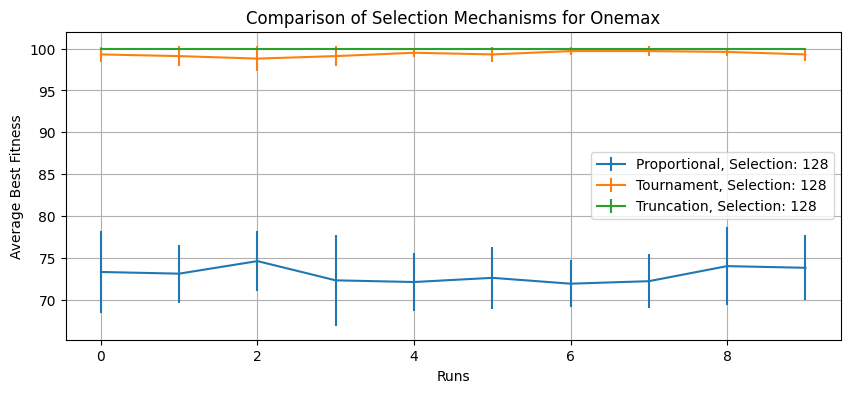

In [26]:
plot_results({
    "Proportional": results_proportional_selection_onemax,
    "Tournament": results_tournament_selection_onemax,
    "Truncation": results_truncation_selection_onemax
}, "Comparison of Selection Mechanisms for Onemax")


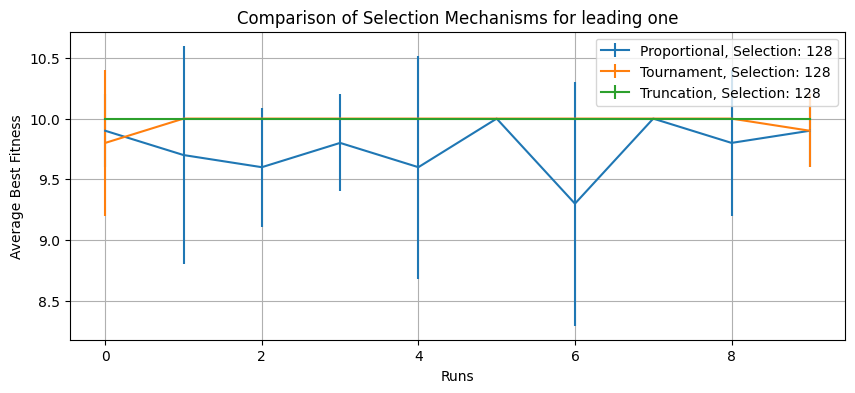

In [27]:
plot_results({
    "Proportional": results_proportional_selection_leading_one,
    "Tournament": results_tournament_selection_leading_one,
    "Truncation": results_truncation_selection_leading_one
}, "Comparison of Selection Mechanisms for leading one")

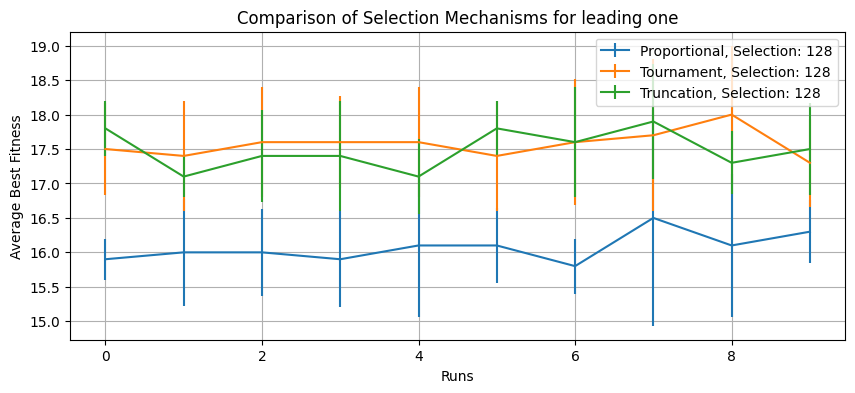

In [28]:
plot_results({
    "Proportional": results_proportional_selection_concat_trap5,
    "Tournament": results_tournament_selection_concat_trap5,
    "Truncation": results_truncation_selection_concat_trap5
}, "Comparison of Selection Mechanisms for leading one")

#### Nhận xét:
##### + Sau nhiều lần chạy thực nghiệm thì kích thước quần thể ở 128 sẽ cho ra kết quả tốt nhất.
##### + Xét về hiệu năng thì phép chọn lọc Truncation selection đưa ra kết quả tốt nhất và ổn định nhất. Đặc biệt ở benchmark leading one thì phép chọn lọc Truncation selection là một đường thẳng. Bên cạnh đó phép chọn lọc Tournament selection cũng không quá thua kém so với Truncation selection khi ở cả ba benchmark đều không thua quá nhiều. Chỉ riêng Proportional selection thể hiện tệ nhất.